In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,state,same_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,48,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,37,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,11,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,56,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,23,1,0,0,0,1


In [4]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'rstudio_yn',
       'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.seniority.value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [9]:
#Fix LA


df['state'] = df.state.apply(lambda x: x.strip() if x.strip() != 'Los Angeles' else 'CA')
df.state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
WI     10
UT     10
MO      9
AZ      9
AL      8
MI      6
GA      6
DE      6
KY      6
IA      5
CT      5
NE      4
LA      4
OR      4
NM      3
KS      3
ID      2
MN      2
SC      1
RI      1
Name: state, dtype: int64

In [10]:
#Job Description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [11]:
#Competitor Count

df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [12]:
df.num_comp

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [13]:
#hourly wage

#df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
#df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [14]:
df[['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,53,91
1,0,63,112
2,0,80,90
3,0,56,97
4,0,86,143
...,...,...,...
737,0,58,111
738,0,72,133
739,0,56,91
740,0,95,160


In [15]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [16]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [17]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'rstudio_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

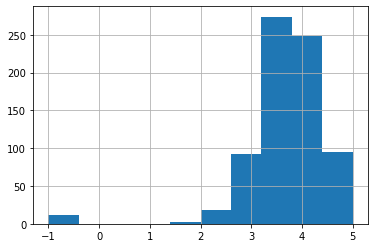

In [19]:
df.Rating.hist()

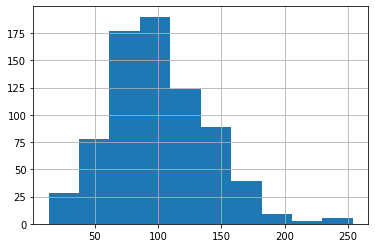

In [20]:
df.avg_salary.hist()

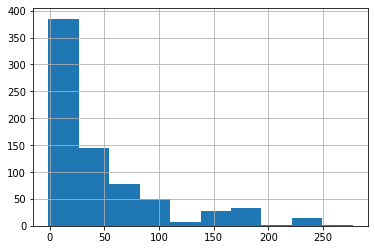

In [21]:
df.age.hist()
#May need to normalize this

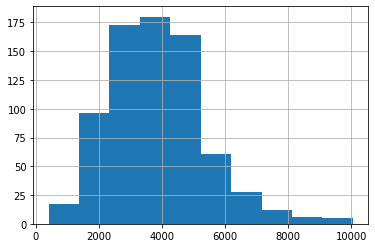

In [22]:
df.desc_len.hist()

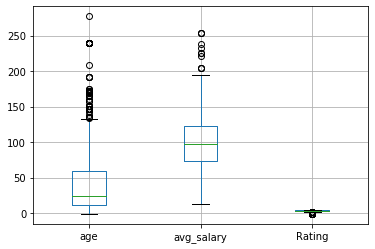

In [23]:
df.boxplot(column= ['age', 'avg_salary','Rating'])

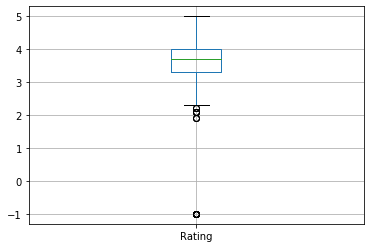

In [24]:
df.boxplot(column= ['Rating'])

In [25]:
df[['age', 'avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019574,0.023162,0.164188
avg_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
desc_len,0.164188,0.078808,-0.012281,1.000000


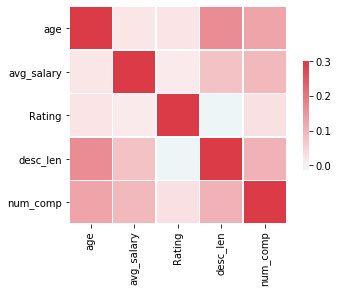

In [26]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt', 'state', 'same_state','spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

This Graph Is For Location: Total = 200


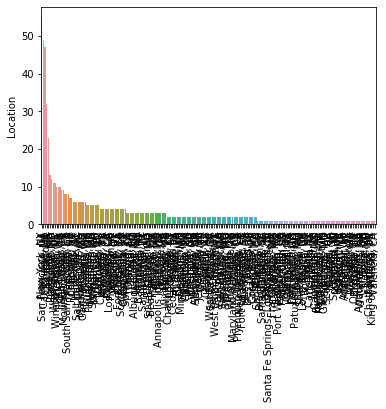

This Graph Is For Headquarters: Total = 198


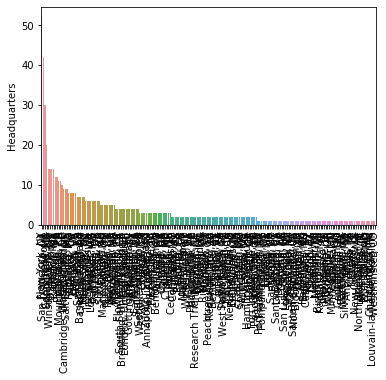

This Graph Is For Size: Total = 9


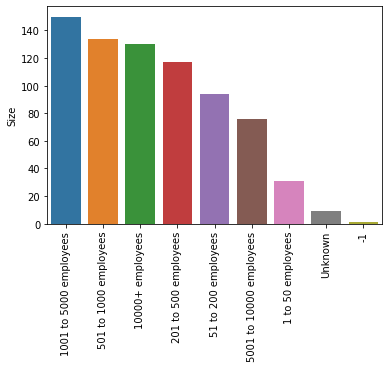

This Graph Is For Type of ownership: Total = 11


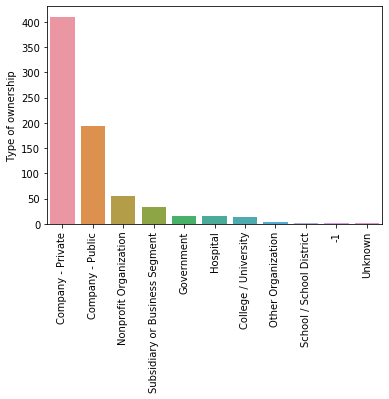

This Graph Is For Industry: Total = 60


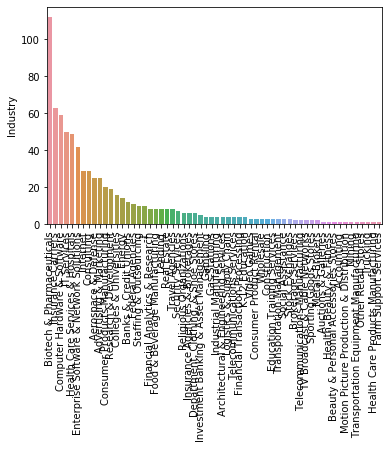

This Graph Is For Sector: Total = 25


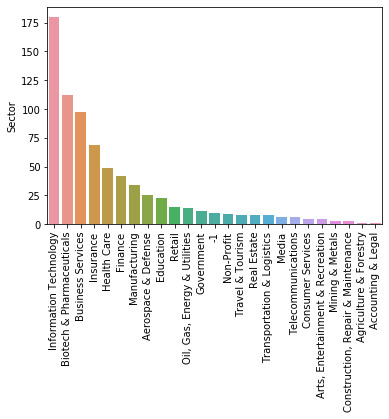

This Graph Is For Revenue: Total = 14


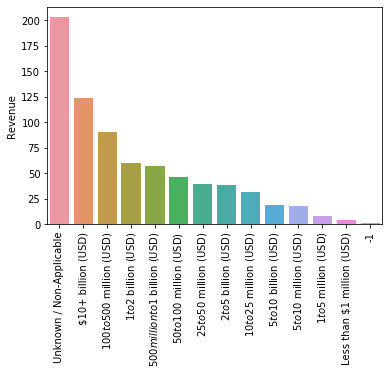

This Graph Is For company_txt: Total = 343


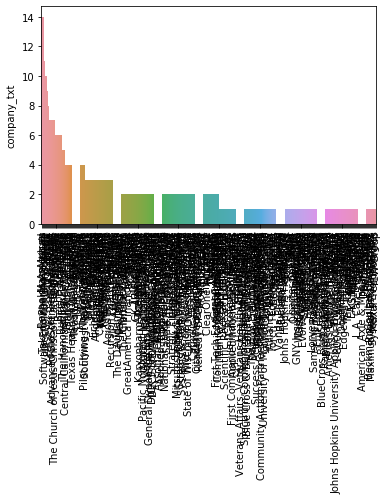

This Graph Is For state: Total = 37


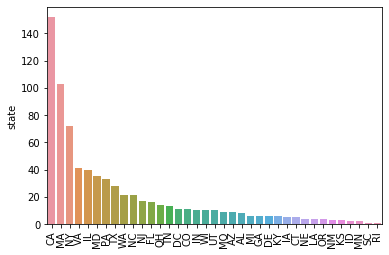

This Graph Is For same_state: Total = 2


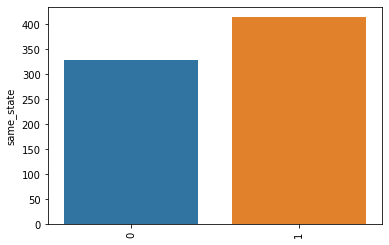

This Graph Is For spark_yn: Total = 2


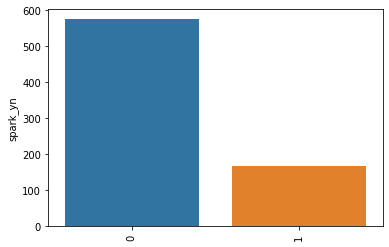

This Graph Is For aws_yn: Total = 2


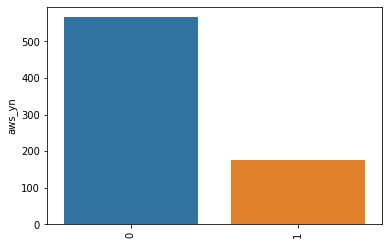

This Graph Is For excel_yn: Total = 2


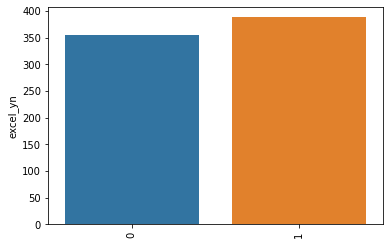

This Graph Is For job_simp: Total = 7


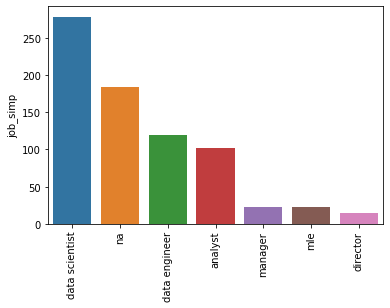

This Graph Is For seniority: Total = 3


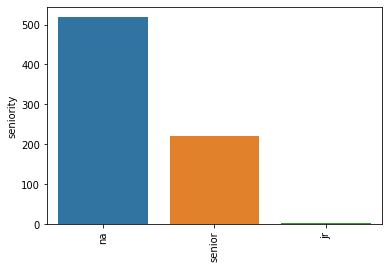

In [28]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("This Graph Is For %s: Total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

This Graph Is For Location: Total = 17


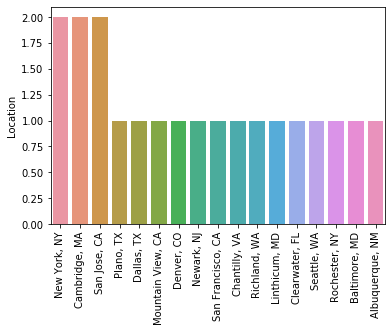

This Graph Is For Headquarters: Total = 16


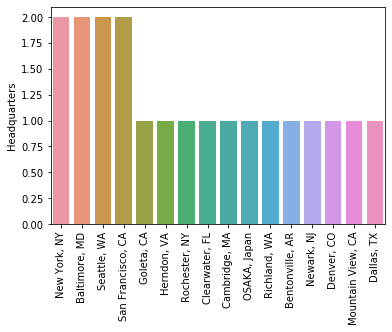

This Graph Is For company_txt: Total = 20


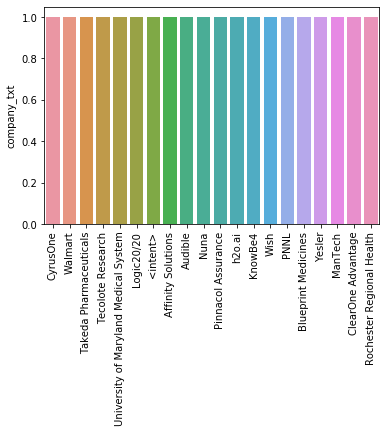

In [29]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i][:20].value_counts()
    print("This Graph Is For %s: Total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'rstudio_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [31]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [32]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [33]:
pd.pivot_table(df, index = 'state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [34]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [35]:
pd.pivot_table(df, index = ['state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('avg_salary', ascending = False)

avg_salary
state job_simp                  
CA    data scientist          68
MA    na                      46
NY    data scientist          40
MA    data scientist          30
CA    na                      27
      data engineer           25
VA    data scientist          18
CA    analyst                 18
WA    data scientist          17
MD    na                      16
IL    data scientist          15
NY    analyst                 14
MD    data scientist          13
TX    data scientist          13
NC    na                      12
MA    data engineer           12
NY    na                      12
VA    data engineer           10
TN    data engineer           10
CA    manager                  9
IL    data engineer            8
TX    data engineer            8
PA    na                       8
      analyst                  8
      mle                      7
TX    na                       7
FL    data scientist           7
OH    data scientist           7
NC    data engineer            6
MA    director                 6
IL    na                       6
      director                 6
NJ    analyst                  6
FL    analyst                  6
DE    na                       6
PA    data scientist           6
VA    analyst                  6
DC    data scientist           5
CA    mle                      5
AZ    data engineer            5
MA    manager                  5
VA    na                       5
AL    analyst                  5
NY    data engineer            4
OH    analyst                  4
NJ    data scientist           4
NE    na                       4
UT    analyst                  4
MI    data scientist           4
MA    analyst                  4
KY    na                       4
DC    data engineer            4
IN    data engineer            4
      na                       4
WI    na                       4
MD    data engineer            3
NM    data scientist           3
IA    data engineer            3
GA    data scientist           3
OH    na                       3
OR    data scientist           3
FL    data engineer            3
PA    manager                  3
CT    na                       3
CO    na                       3
      data scientist           3
      data engineer            3
UT    data engineer            3
      data scientist           3
WA    analyst                  3
WI    analyst                  3
      data scientist           3
IL    analyst                  3
GA    na                       3
MD    analyst                  3
MO    data scientist           3
      na                       3
KS    mle                      3
NC    data scientist           3
TN    analyst                  2
MO    analyst                  2
VA    mle                      2
CT    data scientist           2
NJ    manager                  2
AL    na                       2
DC    analyst                  2
LA    data engineer            2
IN    data scientist           2
KY    data scientist           2
MI    manager                  2
NJ    data engineer            2
IA    analyst                  2
NY    mle                      2
IL    mle                      2
ID    analyst                  2
NJ    director                 2
AZ    na                       2
WA    na                       1
CO    analyst                  1
MN    analyst                  1
AL    data engineer            1
AZ    analyst                  1
      data scientist           1
NJ    na                       1
MN    data engineer            1
MO    manager                  1
CO    mle                      1
TN    data scientist           1
SC    na                       1
RI    analyst                  1
PA    data engineer            1
LA    analyst                  1
      na                       1
OR    data engineer            1

In [36]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'rstudio_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [38]:
df_pivots= df[['Rating','Industry', 'Sector', 'avg_salary', 'Revenue','num_comp','hourly', 'employer_provided','python_yn', 'rstudio_yn',
       'spark_yn', 'aws_yn', 'excel_yn','Type of ownership']]

In [39]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))
    

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [40]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [41]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [43]:
df.to_csv('eda_data.csv')
